<a href="https://colab.research.google.com/github/jjongdals/2024S-Ajou-ML/blob/main/HW2_201921782_%EB%B0%95%EC%A2%85%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1. Linear SVM vs Kernel SVM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


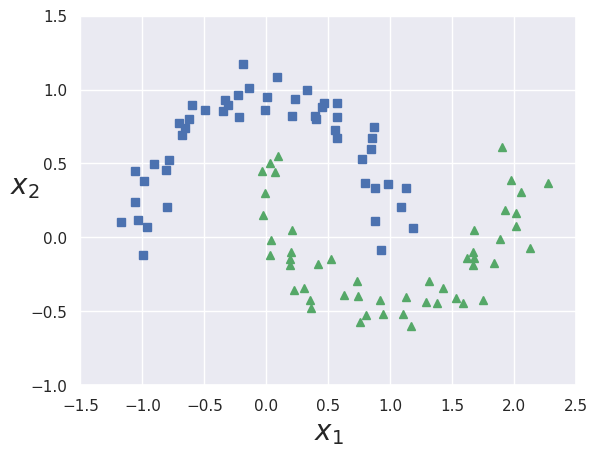

In [64]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

#Toy example 생성
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [65]:
# decision boundary 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

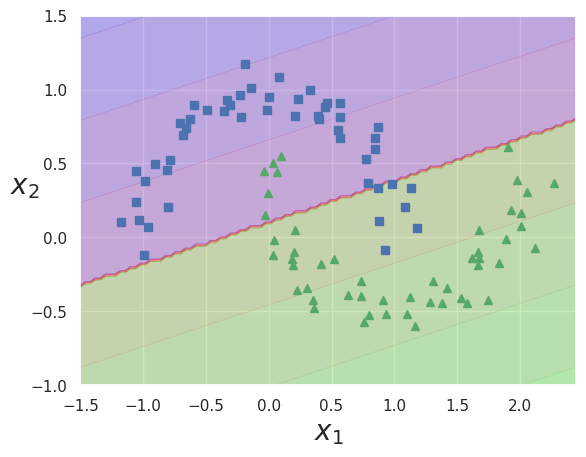

In [66]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=1)
linear_svc.fit(X,y)
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

## 문제 1-1 Kernel SVM 학습

Kernel SVM을 아래의 조건에 맞게 학습하고 시각화를 진행하시오.

\

---
*조건*

 1. `rbf` Kernel을 사용하여 주어진 X를 `100% 정확도`로 예측하는 하이퍼파라미터를 찾으시오.
 2. `Linear SVM`과 `Kernel SVM`의 decision boundary를 시각화하시오.
 3. subplot을 활용하여 기존 `Linear SVM`와 비교할 수 있도록 시각화하시오.
 ---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

Text(0.5, 1.0, 'rbf')

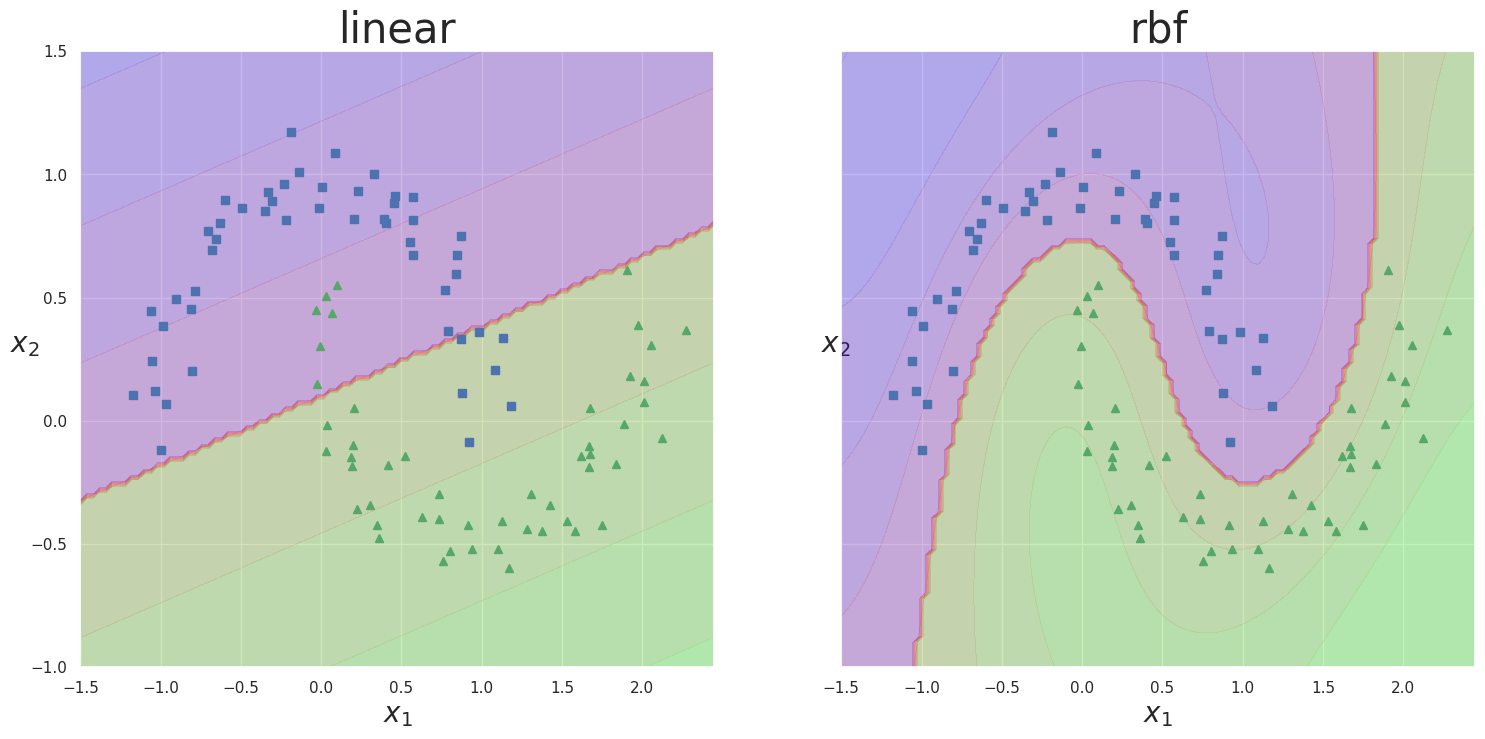

In [67]:
from sklearn.svm import SVC

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharex=True, sharey=True)

plt.sca(axes[0])
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("linear", fontsize=30)

#####################문제1-1###############################
# rbf kernel SVC 생성 및 주어진 모델 fit, rbf kernel 파라미터는 C, gamma
# gamma: scale, auto 중 auto (default는 auto), C=1^(10)
rbf_svc = SVC(kernel='rbf', C=1E10, gamma='auto')
rbf_svc.fit(X,y)
# 위의 linear_svc와 마찬가지로 각 함수에 동일한 axes 삽입
plt.sca(axes[1])
plot_predictions(rbf_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("rbf", fontsize=30)
##########################

# 문제 1-2 Kernel SVM의 장점

* **해당 데이터에서 Linear SVM보다 Kernel SVM이 잘 동작할 수 있는 이유를 서술하시오.**
* **데이터의 분포와 모델의 특징을 연결지어서 설명하시오.**

**정답** :Linear SVM의 경우에는 classifier가 선형적으로 분류하여 Decision boundary가 선형적인 단순한 형태의 구조를 보인다. SVM의 원리는 Decision boundary를 기준으로 데이터를 분류하는 모델이기 때문에Linear SVM의 경우 Decision boundary가 단순하여 데이터를 분류할 때 선형적인 양상을 보이지 않으면, SVM이 쉽게 분류하지 못한다는 문제점이 존재한다. 이러한 문제를 Non linear한 문제라고 하는데, 이는 Kernel 기반 모델을 활용하여 분류하는 작업을 진행해야 한다. 해당 데이터도 데이터의 분포를 살펴보면 단순하게 선형적으로 해결할 수 없는 데이터의 분포를 보인다. 각 클래스가 복잡한 곡선으로 경계가 나누어지기 때문에 Kernel 기반 SVM을 활용해야 한다. Kerel SVM은 kernel trick을 활용하여 변환된 공간에서 분류를 진행한다. 즉, 고차원의 연산이 가능하게끔 하여 차원을 한단계 높여 단순한 차원에서의 풀지 못하는 분류 문제를 해결하려는 모델의 특성 때문에 저차원에서의 복잡한 분류 문제를 해결할 수 있다 . Kernel의 종류에는 다항식, RBF커널, Sigmoid 등이 존재하며 위의 문제는 RBF 커널을 활용하여 비선형적인 데이터 분포를 고차원으로 확장시켜 kernel trick을 가지는 특징이 있는 kernel SVM을 사용하여 문제를 해결할 수 있었다.

## 데이터 코드

# 문제 2. Validation

- `Test set` **<font color=red> 은 문제 2-3에서만 사용해야 합니다. </font>**

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

# dir을 바꿔주세요.
# digits_clean 데이터를 사용해야 합니다.

data = pd.read_csv('/content/drive/MyDrive/digits_clean.csv').to_numpy()
labels = pd.read_csv('/content/drive/MyDrive/digits_target.csv').to_numpy().reshape(-1)
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size= 0.2, random_state = 12)

## 문제 2-1

 - 아래 코드의 방식으로 평가 시 발생하는 문제를 서술하시오.
 - `Model fitting` 관점에서 서술
 - Validation set의 목적

In [69]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=100, C=100)
rbf_kernel_svm_clf.fit(train_X, train_y)
X_val, y_val = train_X, train_y
print(f"Validation score : {rbf_kernel_svm_clf.score(X_val, y_val)}")

Validation score : 1.0


#### 정답 : 모델을 fitting하고 결과를 보니 100%의 validation score가 나오는 것을 볼 수 있다. 이는 모델의 정확도가 단순히 100%라고 생각할 수도 있지만, 실상은 그렇지 않다. 위 코드에서 train과 test를 나눈 비율을 살펴보니 train 80%, test 20% 비율로 나누었는데, 모델에 대한 검증을 test data set에서 진행했다. 이는 별도의 하이퍼파라미터 튜닝을 진행하지 않고 고정된 파라미터를 가지고 모델에 대한 평가를 진행한다. 즉, 하이퍼파라미터를 조정하지 않고 고정된 값으로 모델을 학습했으며, 이는 특정한 데이터에만 최적화되어 있을 수 있고, 최적의 파라미터를 찾는 게 아니라 overfitting된 결과나 최적의 파라미터 조합으로 학습하지 않은 결과를 초래할 수 있다. 이러한 문제는 validation set를 추가하여 해결할 수 있는데, validation set의 목적은 train set에서 따로 파라미터를 평가할 수 있는 부분을 떼어내어 모델이 학습 데이터에서 최적의 파라미터를 찾을 수 있게 하고, 하이퍼 파라미터를 튜닝하여 모델의 일반화 능력을 평가하고 향상시키는 것이다. 따라서 모델의 성능을 제대로 평가하고 실제 상황에 적합하게 만들기 위해서는 train set에서 떼어내 별도의 validation set을 사용하여 model의 파라미터를 평가해야 하고, model fitting은 그 나머지의 부분인 train set에서 진행하되 최적의 파라미터를 찾은 후 전체 train data set에서 진행해야 한다.

##문제 2-2 K-fold Cross validation

5-fold Cross Validation (CV) 을 사용하여 모델을 평가하시오.

\

---
*조건*
1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. Cross validation score의 분산과 평균을 출력하시오.
3. Cross validation score(Accuracy)가 0.8 이상인 Hyperparameter를 찾고 전체 train set으로 학습하시오.
4. `Test set`에 대해서 `문제 2-1`에서 학습한 모델과 최종 성능에 대해서 비교하시오 (출력만 하시면 됩니다).

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [63]:
from sklearn.model_selection import KFold


#####################문제2-2###############################
# kfold 객체 생성
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# 파라미터 값 배열에 저장
gamma = [0.0005, 0.001, 0.01, 0.05, 0.08]
C = [1, 10, 50, 100, 200]
# best score, 0.8이상의 결과를 뽑아내기 위해 변수 선언 및 초기화
best_score = 0
cri_score = []
cri_var = []
for g in gamma:
  for c in C:
    scores = []
    # 설정한 kfold 값을 바탕으로 train, test의 위치를 나누고 이를 train set , test set으로 나눔
    for train_idx, val_idx in cv.split(train_X):
      X_train, X_val = train_X[train_idx], train_X[val_idx]
      y_train, y_val = train_y[train_idx], train_y[val_idx]
      # kernel_svm_clf 모델 초기화 및 학습
      kernel_svm_clf = SVC(kernel='rbf', gamma=g, C=c)
      kernel_svm_clf.fit(X_train, y_train)
      score = kernel_svm_clf.score(X_val, y_val)
      scores.append(score)
    # 각 score에 대한 평균과 분산을 구함 numpy 함수 활용
    mean = np.mean(scores)
    var = np.var(scores)
    # 문제 조건에서 각 param에 대해 전체를 출력하라는 조건이 없었으므로 가장 점수가 높은 param 저장
    if mean > best_score and mean >= 0.8:
      best_score = mean
      best_params = {'gamma': g, 'C': c}
      best_var = var

# 평균 분산 best 파라미터 출력
print(f"best 평균 : {best_score}")
print(f"best 분산 : {best_var}")
print(f"최적의 파라미터 : (gamma): {best_params['gamma']}, (C): {best_params['C']}" )
# 최종 모델 학습
final_svm = SVC(kernel='rbf', **best_params)
final_svm.fit(train_X, train_y)
#########################################################
print(f"final_model 정확도 : {final_svm.score(test_X,test_y)}")
print(f"2-1 model 정확도 : {rbf_kernel_svm_clf.score(test_X,test_y)}")

best 평균 : 0.9904347826086957
best 분산 : 7.1077504725898e-05
최적의 파라미터 : (gamma): 0.001, (C): 1
final_model 정확도 : 0.9895833333333334
2-1 model 정확도 : 0.1076388888888889


# 문제 2-3 Stratified K-fold Cross validation

위에서 찾은 하이퍼파라미터로 Stratified K-fold Cross validation을 진행하면서 각 fold의 test y(class)의 분포를 histplot(혹은 barplot) 시각화하세요.

\

---
*조건*

1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. fold 별 y 분포 그래프의 경우, 주어진 subplot을 활용하세요.
3. (Stratified) Cross validation score의 분산과 평균을 출력하시오.

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [59]:
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

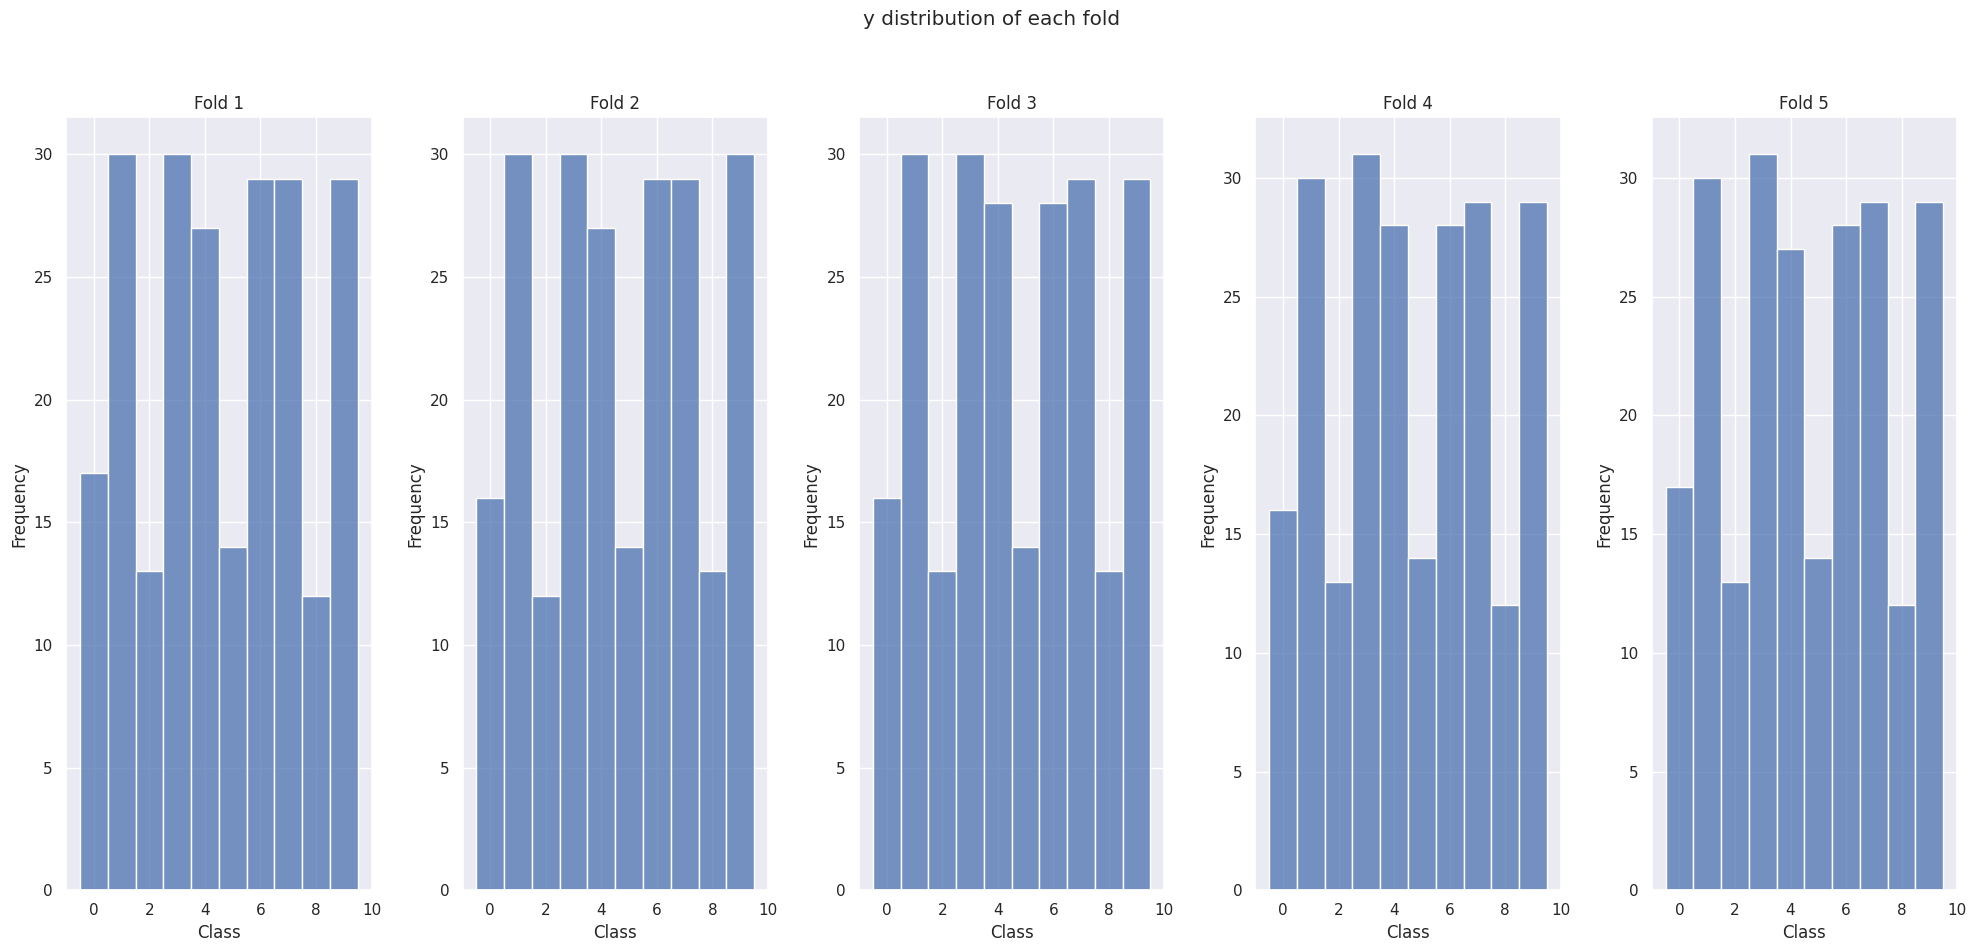

평균 : 0.5534782608695653
분산 : 0.1879396975425331


In [60]:
#####################문제2-3###############################
gamma = best_params['gamma']
C = best_params['C']
# skf 객체 생성
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i, (train_idx, val_idx) in enumerate(skf.split(train_X, train_y)):
    X_train, X_val = train_X[train_idx], train_X[val_idx]
    y_train, y_val = train_y[train_idx], train_y[val_idx]
    # 모델 학습
    kernel_svm_clf = SVC(kernel='rbf', gamma=gamma, C=C)
    kernel_svm_clf.fit(X_train, y_train)
    score = kernel_svm_clf.score(X_val, y_val)
    scores.append(score) # scores 배열에 저장
    # y_val 분포 시각화
    sns.histplot(y_val, ax=axes[i], bins=np.arange(y_val.min(), y_val.max() + 2) - 0.5)
    axes[i].set_title(f'Fold {i+1}')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Frequency')
mean_score = np.mean(scores)
var_score = np.var(scores)
# 각 y분포마다 시각화를 진행함
plt.suptitle('y distribution of each fold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# 평균 및 분산 출력
print(f"평균 : {mean_score}")
print(f"분산 : {var_score}")
########################################################

# 문제 3. Grid search

- Scikit-learn 라이브러리를 이용하여 RandomForestClassifier의 최적의 파라미터를 찾는다.

- 아래 baseline 모델보다 높은 성능을 보이는 RandomForestClassifier 모델을 구축한다.

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# dir 바꾸시기 바랍니다.
df = pd.read_csv('/content/drive/MyDrive/Bank_clean.csv')


# 코드 건드리지 말 것
for i in df.columns: # label encoding
    if type(df[i].unique()[0]) == str :
      le = LabelEncoder()
      df[i] = le.fit_transform(df[i])

y = df['y']
X = df.drop(columns = 'y')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split dataset

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 코드 건드리지 말 것
clf = RandomForestClassifier(n_estimators = 10) # Baseline Model
score=cross_val_score(clf, X_train, y_train, cv=5)
print(f"baseline cross validation score : {score.mean()}")

baseline = clf.fit(X_train,y_train)

baseline cross validation score : 0.8451510333863276



### 문제 3-1
주어진 링크를 참고하여 변경가능한 hyperparameter를 `param_grid`에 추가하세요.

그리고 추가한 hyperparameter에 대해 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고, Accuracy 기반 가장 높은 성능을 보이는 best hyperparameter를 확인하세요.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

---
*조건*

- **<font color=red>* Baseline보다 validation score(ACC)가 높아야 합니다. (낮을 시 감점)</font>**
- **충분히 grid search를 진행하세요.**


---



* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [39]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [40]:
##param_grid##를 추가하세요
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # 트리의 수
    'max_depth': [None, 10, 20, 30],  # 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드에 있어야 할 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2']  # 최적의 분할을 위해 고려할 특성의 수
}

In [41]:
clf = RandomForestClassifier(random_state=42) # 과제를 위해 random_state를 고정해두었습니다.


########################## 문제 3-1 ##########################
########################## 코드 작성 ##########################
# 그리드 서치 객체 생성 및 학습 진행
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
# 파라미터 및 score 저장
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

############################################################

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8599364069952304


### 문제 3-2
3-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 다음 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.



\

---
*조건*

* **<font color=red>test accuracy가 0.87 미만일 경우 감점</font>**
* **충분히 grid search를 진행하세요.**
---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 출력 결과와 함께**(한 이미지에)** 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.



In [42]:
from sklearn.metrics import accuracy_score

## 문제 3-2 ##
## 코드 작성 ##
# grid search 중 가장 최적의 parameter를 조합한 모델 객체 생성 및 학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

############


y_pred1 = baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred1)

y_pred2 = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred2)

print(f'Base Model 정확도: {baseline_accuracy:.4f}')
print(f'Best Model 정확도: {best_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Base Model 정확도: 0.8563
Best Model 정확도: 0.8767


#문제 4. evaluation
### 문제 4-1
문제 3에서 얻은, baseline이 구한 예측값 `y_pred1`과 grid_search로 구한 Best model의 `y_pred2`를 바탕으로, 각 모델의 성능을 평가해봅시다.

confusion matrix를 그리고, F1, Precision, Recall의 평가 지표를 출력하는 코드를 작성하세요.


---


*조건*
1. 주어진 코드를 기반으로 시각화를 진행하세요.
2. Plot 안에 score들이 출력돼야 합니다. (print 함수 X)
3. axes[i].text를 건드리지 마세요.



---




* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

* 힌트) heatmap

In [43]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

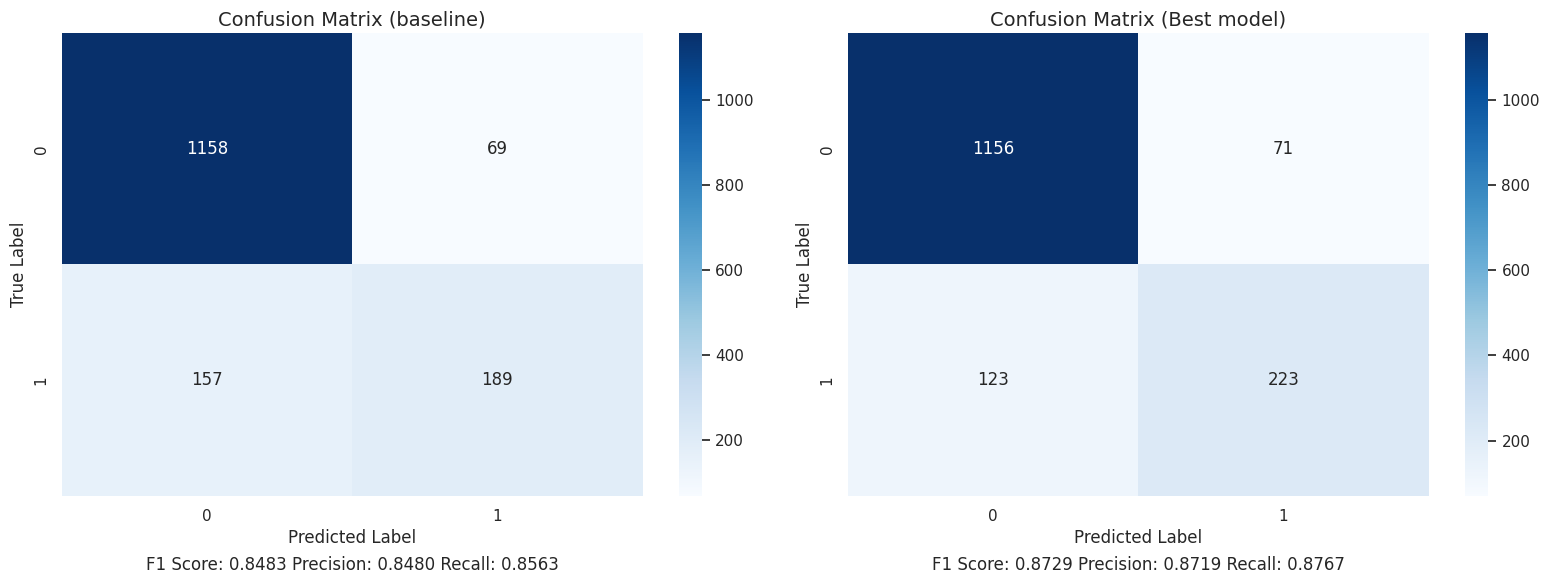

In [47]:
########################## 문제 4-1 ##########################
########################## 코드 작성 ##########################
# baseline model 각 스코어 및 confusion matrix를 그리기 위해 변수 선언
cm1 = confusion_matrix(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1, average='weighted')
precision_1 = precision_score(y_test, y_pred1, average='weighted')
recall_1 = recall_score(y_test, y_pred1, average='weighted')
# best model 각 스코어 및 confusion matrix를 그리기 위해 변수 선언
cm2 = confusion_matrix(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2, average='weighted')
precision_2 = precision_score(y_test, y_pred2, average='weighted')
recall_2 = recall_score(y_test, y_pred2, average='weighted')
# 그래프 그리기
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# 첫 번째 subplot: baseline model
sns.heatmap(cm1, annot=True, fmt="d", cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (baseline)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=12)
# 두 번째 subplot : Best model
sns.heatmap(cm2, annot=True, fmt="d", cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (Best model)', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].text(0.5,-0.15, f'F1 Score: {f1_2:.4f} Precision: {precision_2:.4f} Recall: {recall_2:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=12)
# subplot 간 간격 조절
plt.tight_layout()
plt.show()

####################################


### 문제 4-2
baseline과 bset_model에 대한 ROC Curve와 AUROC를 구하고, 두 모델의 ROC Curve를 시각화하시오.

\

---

*조건*
1. 두 모델의 ROC Curve (line)를 비교할 수 있도록 **하나의 그래프**에 시각화해야 합니다.
2. plot의 legend 안에 각 모델의 AUROC score를 출력하시오. (예시, Best model (area = 0.833))



---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 힌트) model**.predict_proba**를 사용


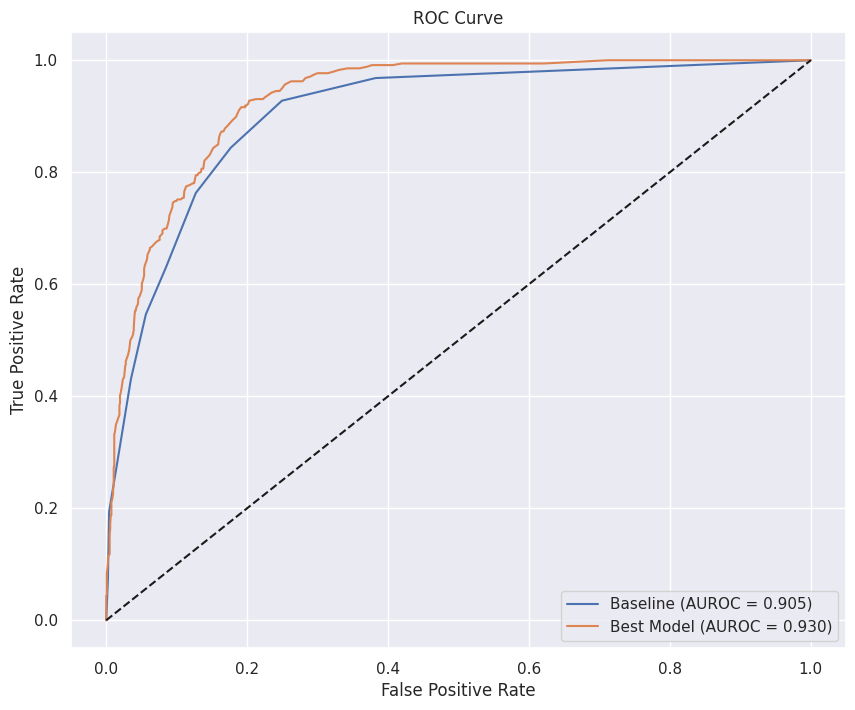

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

########################## 문제 4-2 ##########################
########################## 코드 작성 ##########################
y_prob1 = baseline.predict_proba(X_test)[:, 1]  # baseline 모델의 양성 클래스에 대한 예측 확률
y_prob2 = best_model.predict_proba(X_test)[:, 1]  # best model의 양성 클래스에 대한 예측 확률

# ROC Curve 계산
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
fpr2, tpr2, _ = roc_curve(y_test, y_prob2)

# AUROC 점수 계산
auroc1 = roc_auc_score(y_test, y_prob1)
auroc2 = roc_auc_score(y_test, y_prob2)

plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'Baseline (AUROC = {auroc1:.3f})')
plt.plot(fpr2, tpr2, label=f'Best Model (AUROC = {auroc2:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# AUROC
############################################################

## 과제 끝